In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:data\hr.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies.

The values present in the below columns represents the given following terms:

Education:
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating:
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction:
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance:
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

All the values present in the other columns are easy to understand.

In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

1) The HR dataset has 1470 rows and 35 columns.

2) There are 26 columns in int64 and 9 columns in object datatype.

3) The dataset has no null values.

In [6]:
# Summary Statistics

In [7]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [8]:
for col in df.columns:
    print(df[col].unique(),'\n')

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] 

['Yes' 'No'] 

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1

In [9]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

* The average age of the people is 36yr
* 1233 are current employees and 237 are ex-employees of the company
* The employees travel rarely
* The average distance from home is 9km.
* The data has shows the outliers are present. 
* The columns 'EmployeeCount','Over18' & 'StandardHours' have only one type of data.

In [11]:
#To check missing data

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

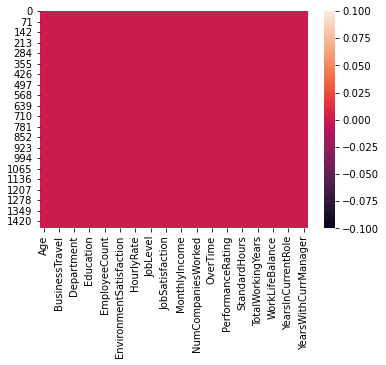

In [13]:
sns.heatmap(df.isnull())

* The dataset has no missing values present we can clearly see that from the visualization

In [14]:
df=df.drop(columns=['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1)

* The columns 'EmployeeCount','Over18','StandardHours' have only one type of value so mostly irrelevant.

In [15]:
 # Visualization  univarient and bivarient 

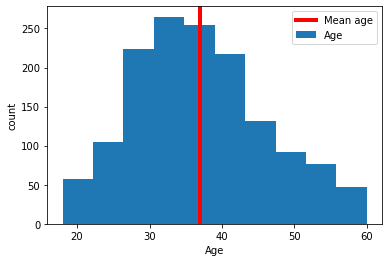

36.923809523809524


In [16]:
df['Age'].plot.hist()
mean_val=np.mean(df['Age']);
plt.axvline(mean_val,linewidth=4,color='red',label='Mean age')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend()
plt.show()
print(df['Age'].mean())

* The data has most people belong to 30-40 yr age range. The mean age of the dataset is 37 yrs.

No     1233
Yes     237
Name: Attrition, dtype: int64


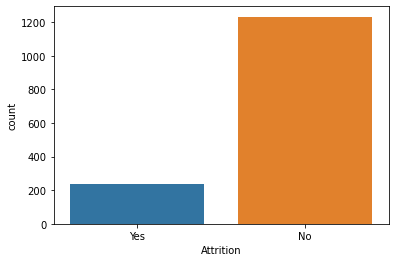

In [17]:
s=sns.countplot(df['Attrition'])
print(df['Attrition'].value_counts())

* The Attrition column has most values as No ie the employees do leave the company.

Male      882
Female    588
Name: Gender, dtype: int64


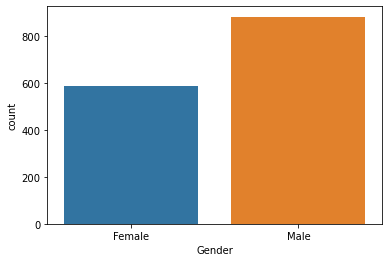

In [18]:
s=sns.countplot(df['Gender'])
print(df['Gender'].value_counts())

* The column has mostly male i.e 882 and 588 are female.

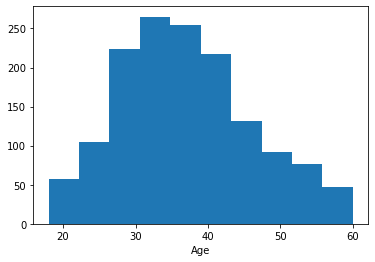

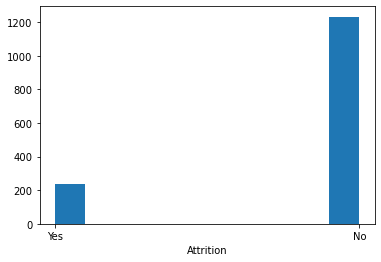

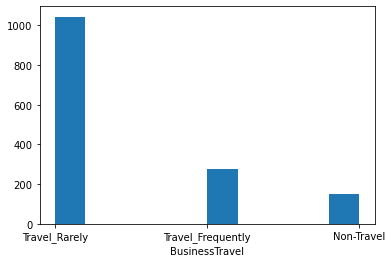

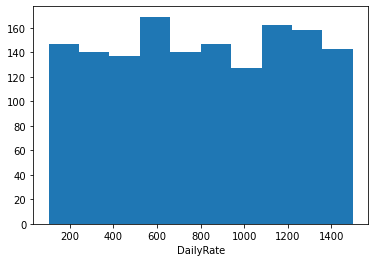

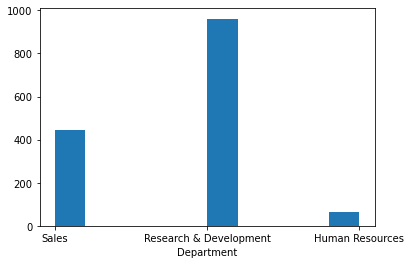

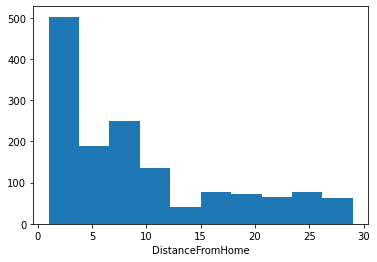

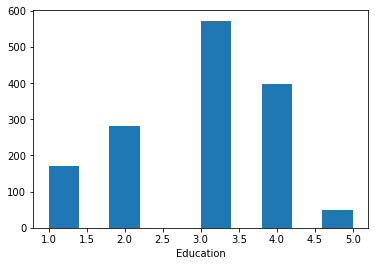

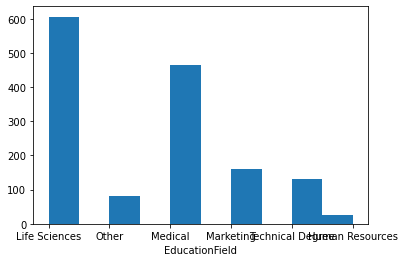

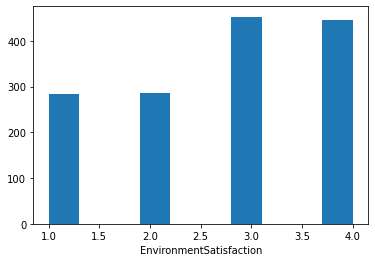

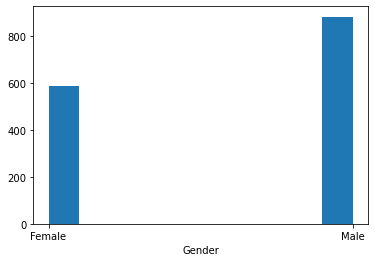

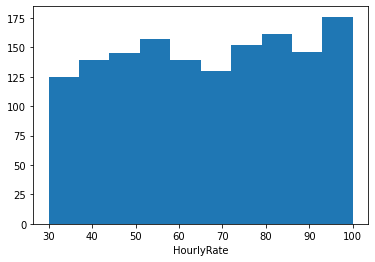

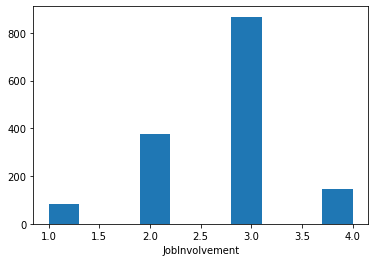

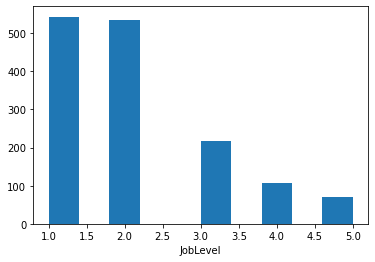

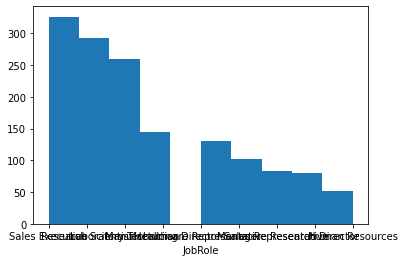

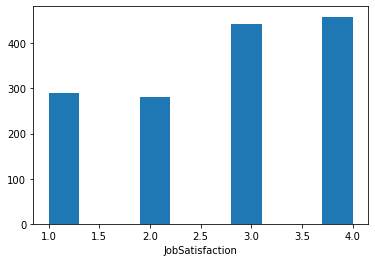

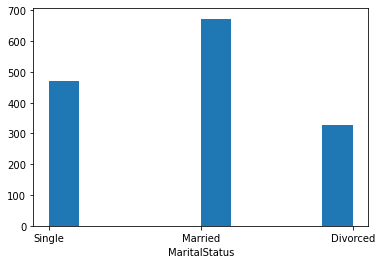

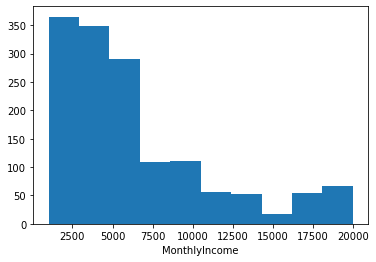

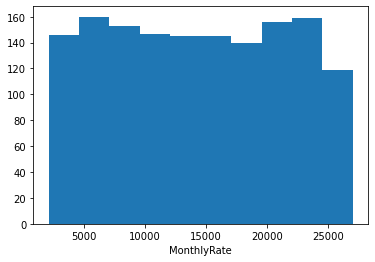

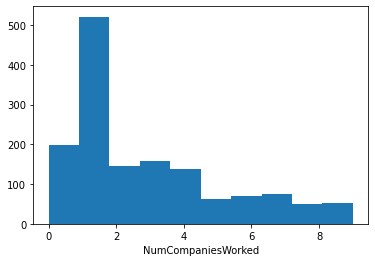

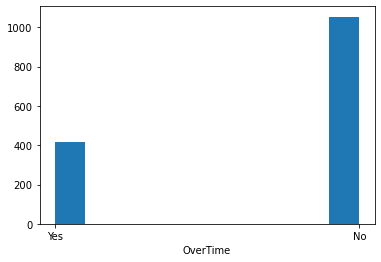

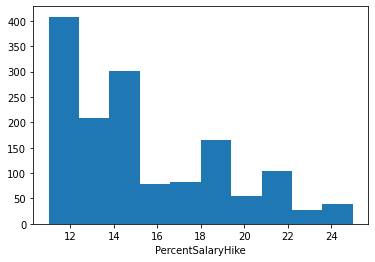

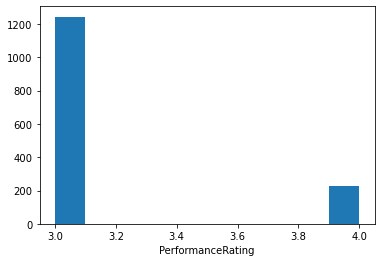

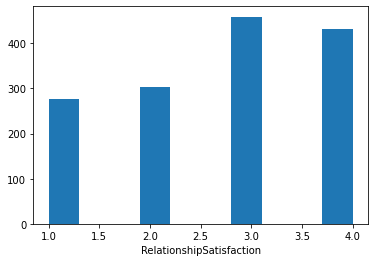

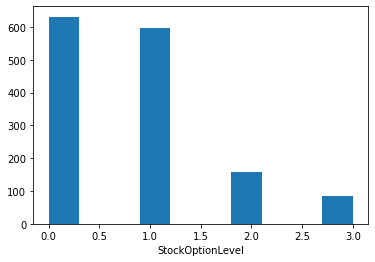

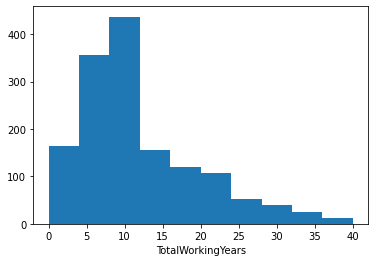

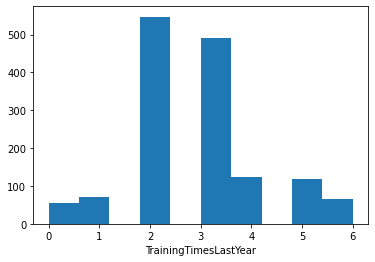

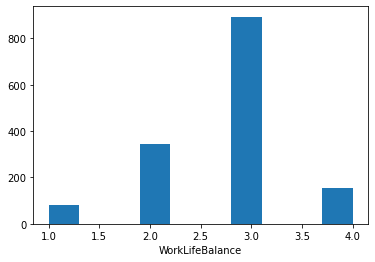

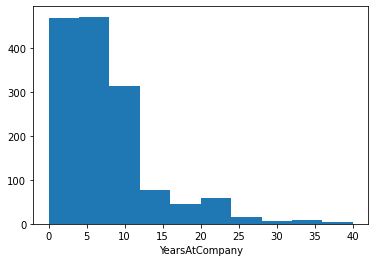

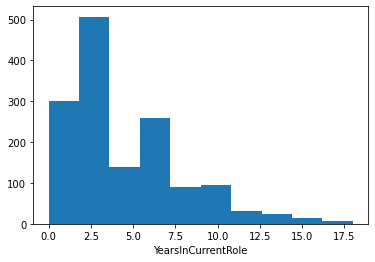

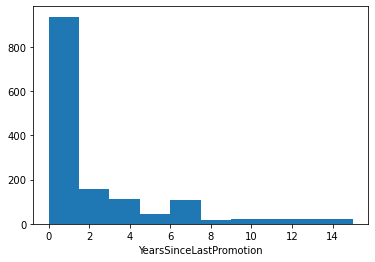

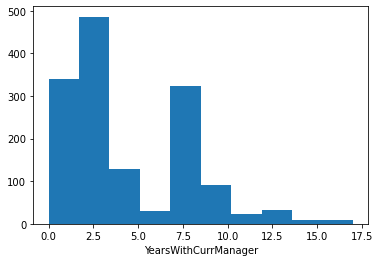

<Figure size 432x288 with 0 Axes>

In [19]:
for i in df.columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.figure()

* The dataset has most people from agegroup 30-35 yr.
* Most people travel less, 0 to 1.5 yr since last promotion, 0-3 yr working with the same manager & in current role.
* Most peoplehave 0-7.5 yr in same company, Most people has 'better' work life balance, 5-10 yr working years, Excelent Performance rating , high Relationship Satisfaction , 12% percent Salary hike.
* Most employees dont do Overtime, worked in 1-2 companies , 2500 monthly income.
* Most employees are married, high job satisfaction , high job involvement, 90-100 hourly rate.
* More employees are Male , high Environment satisfaction , Life science as Education field.
* Most employees are Bachelor.

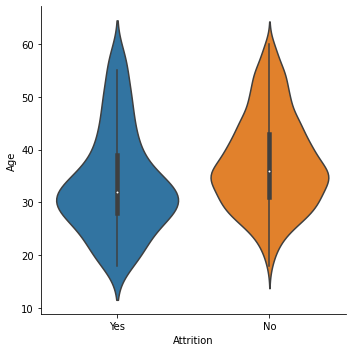

In [20]:
sns.catplot(x='Attrition',y='Age',data=df,kind='violin')

* The employees who leave the job belong to Age around 30 yr.
* The employees of the company are mostly between 30-40 yr.

In [21]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

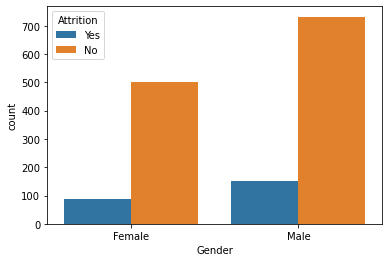

In [22]:
sns.countplot(x='Gender',hue='Attrition',data=df)

* More male employees leave the job than Female employees.

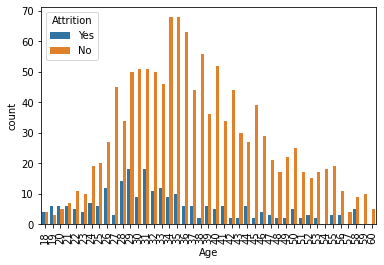

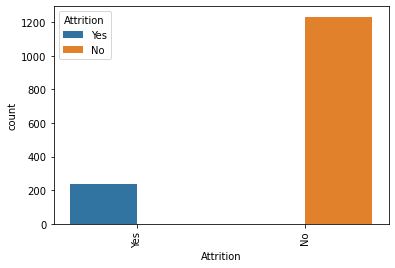

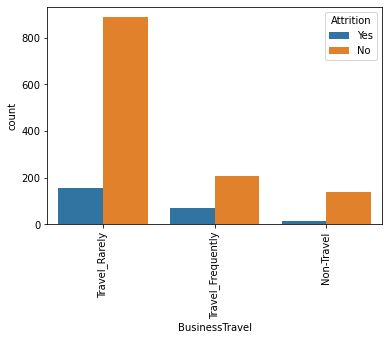

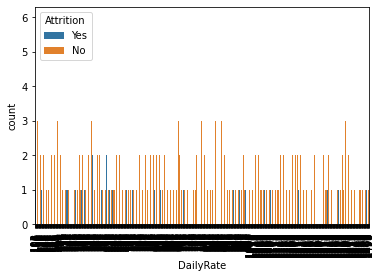

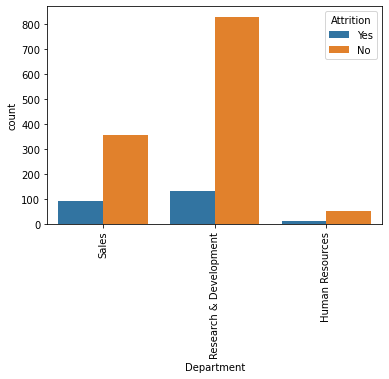

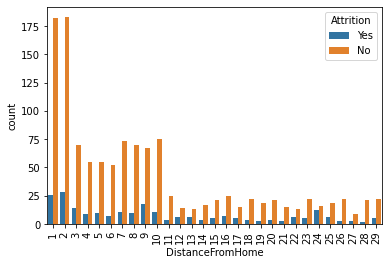

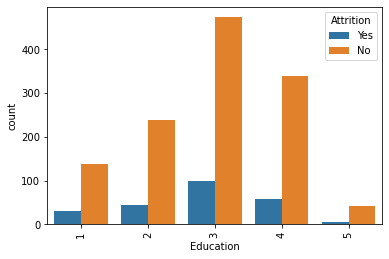

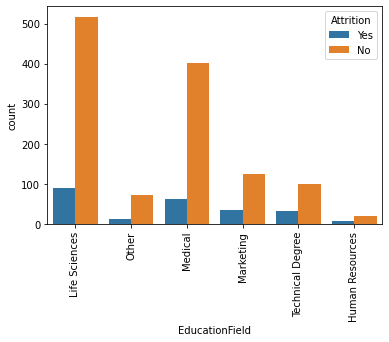

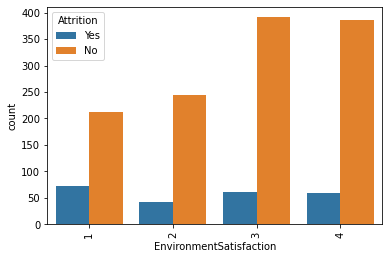

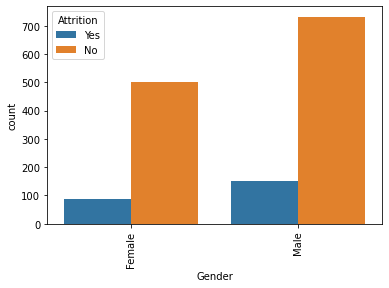

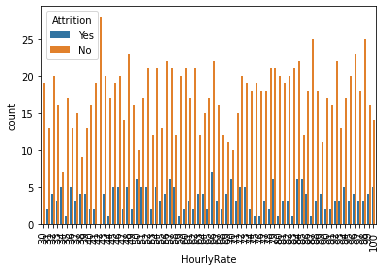

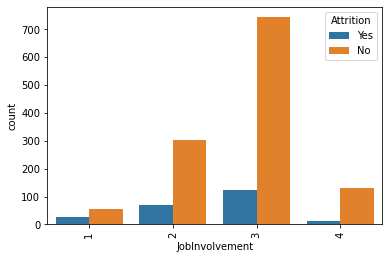

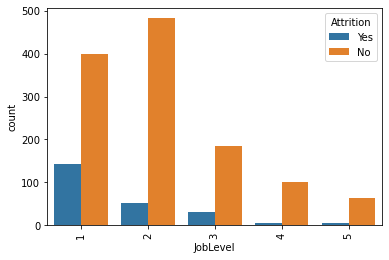

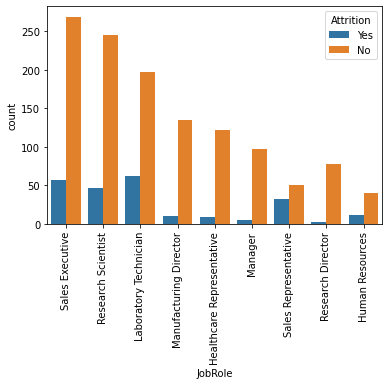

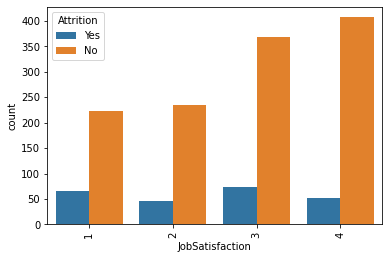

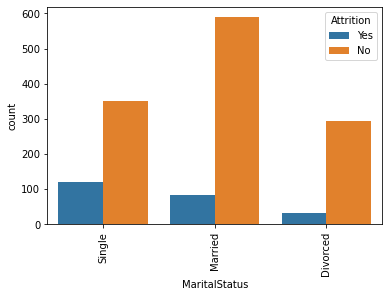

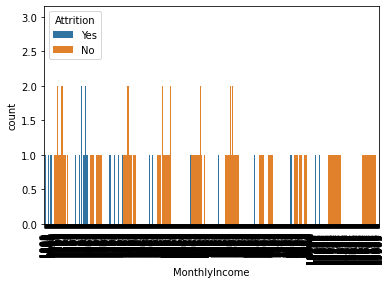

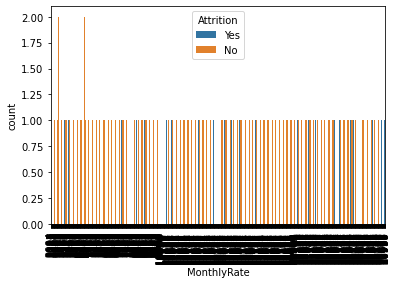

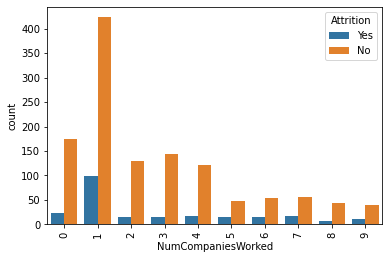

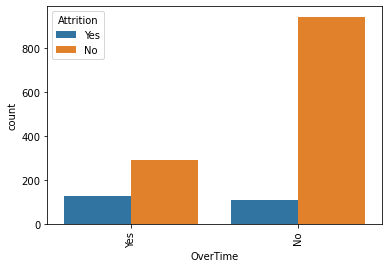

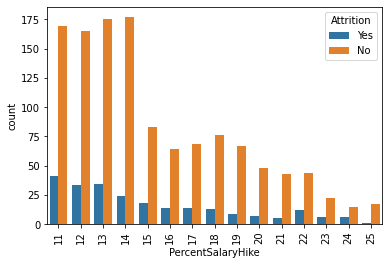

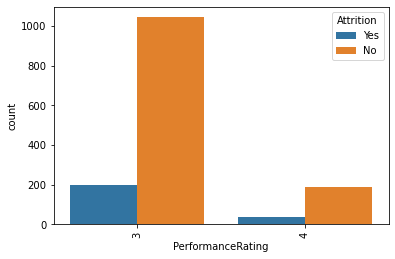

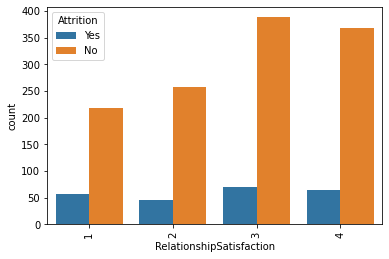

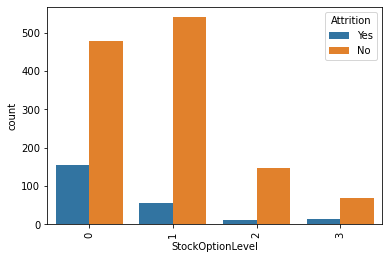

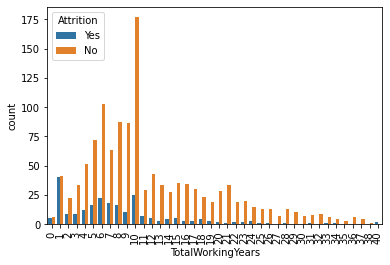

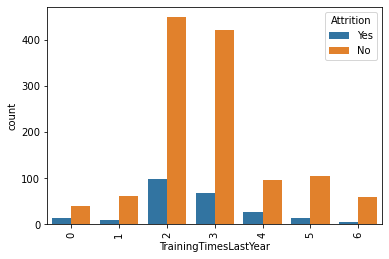

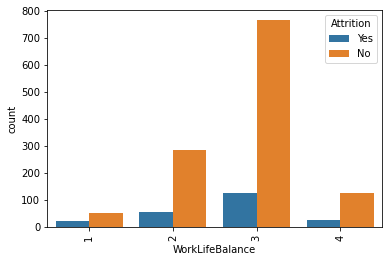

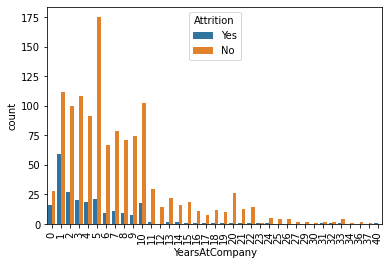

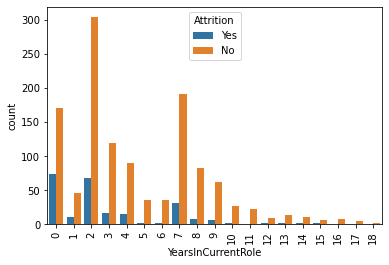

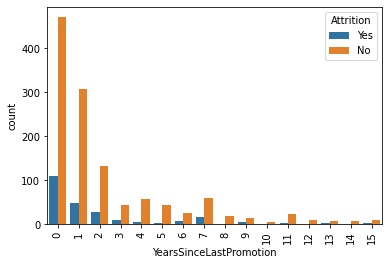

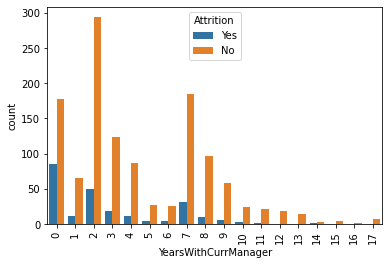

In [23]:
for i in df.columns:
    sns.countplot(x=i,hue='Attrition',data=df)
    plt.xticks(rotation=90)
    plt.show()

* Employee who leave the company are of age 29 & 31.   
* The employees who leave company Travel rarely, are from R&D department ,live around 2 km , have Bachelor Degree , from life Science field , with 'LOW' Environment Satisfaction , Male , 'HIGH' Job involvement, Laboratory Technician , 'HIGH' job satisfaction , Single , worked in 1 company , do Overtime , 11% salary hike ,'HIGH'performance rate ,working years as 1 ,'High' work life balance, works 1 yr in the company , 0 or 2 yr in current role , 0 yr since promotion , 0 yr work with current manager.

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

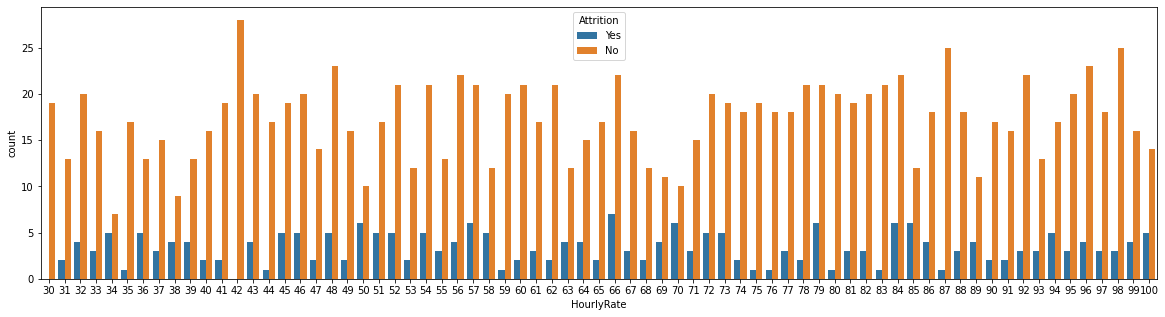

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(x='HourlyRate',hue='Attrition',data=df)

* Employees with Hourly rate 66 leave the company followed by 70,79 and so on.

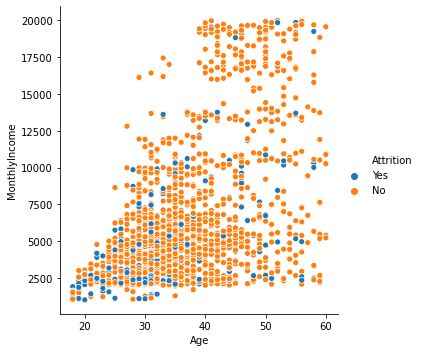

In [26]:
sns.relplot(x='Age',y="MonthlyIncome",hue="Attrition", data=df);

* Employees with monthly income below 10000 and age below 35 yr are more likely to leave.

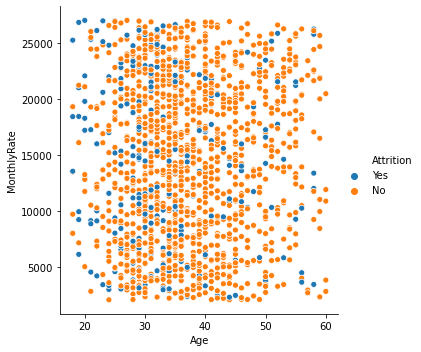

In [27]:
sns.relplot(x='Age',y="MonthlyRate",hue="Attrition", data=df);

* Employees with monthly rate and age below 35 yr are more likely to leave.

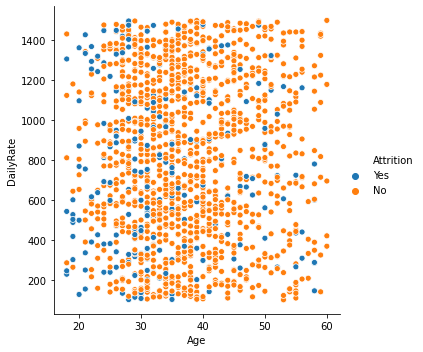

In [28]:
sns.relplot(x='Age',y="DailyRate",hue="Attrition", data=df);

* Employees with Daily rate and age below 35 yr are more likely to leave.

In [29]:
# Converting Categorical data into numerical dataa

In [30]:
from sklearn import preprocessing 
columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for i in columns:
    label_encoder = preprocessing.LabelEncoder()   
    df[i]= label_encoder.fit_transform(df[i]) 
    df[i].unique() 

In [31]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

All data is converted into numerical datatype.

Age                             AxesSubplot(0.125,0.71587;0.0731132x0.16413)
Attrition                    AxesSubplot(0.212736,0.71587;0.0731132x0.16413)
BusinessTravel               AxesSubplot(0.300472,0.71587;0.0731132x0.16413)
DailyRate                    AxesSubplot(0.388208,0.71587;0.0731132x0.16413)
Department                   AxesSubplot(0.475943,0.71587;0.0731132x0.16413)
DistanceFromHome             AxesSubplot(0.563679,0.71587;0.0731132x0.16413)
Education                    AxesSubplot(0.651415,0.71587;0.0731132x0.16413)
EducationField               AxesSubplot(0.739151,0.71587;0.0731132x0.16413)
EnvironmentSatisfaction      AxesSubplot(0.826887,0.71587;0.0731132x0.16413)
Gender                         AxesSubplot(0.125,0.518913;0.0731132x0.16413)
HourlyRate                  AxesSubplot(0.212736,0.518913;0.0731132x0.16413)
JobInvolvement              AxesSubplot(0.300472,0.518913;0.0731132x0.16413)
JobLevel                    AxesSubplot(0.388208,0.518913;0.0731132x0.16413)

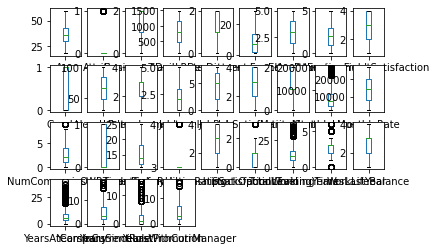

In [32]:
df.plot(kind='box',subplots=True,layout=(4,9))

The dataset has some columns with outliers. no zscore is applied to remove as it is removing all the data.

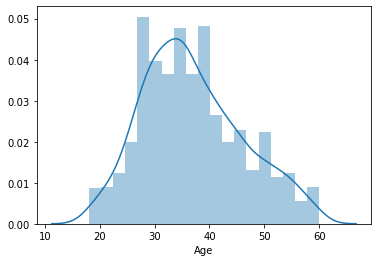

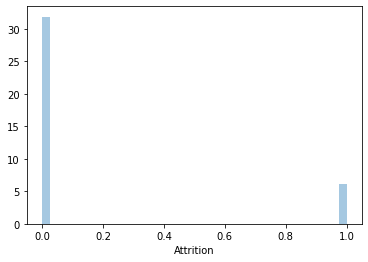

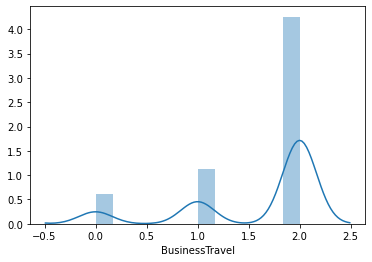

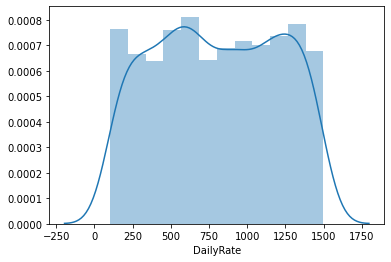

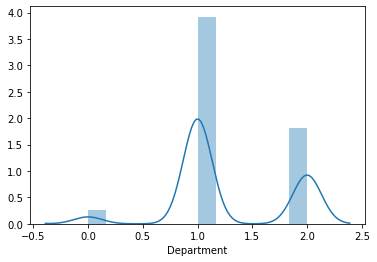

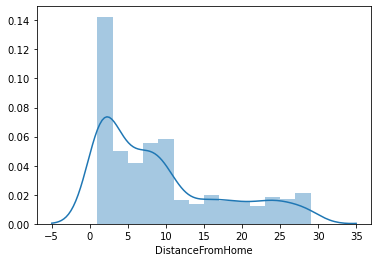

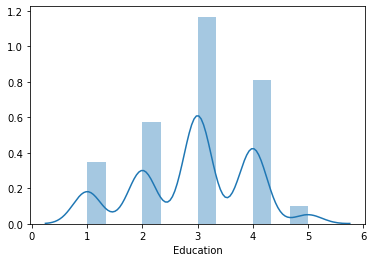

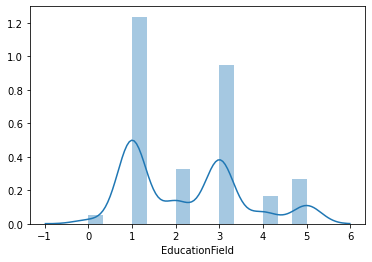

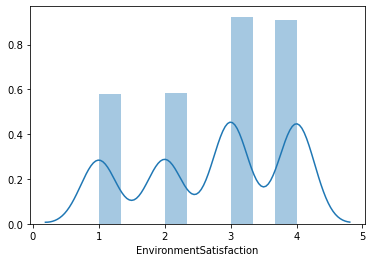

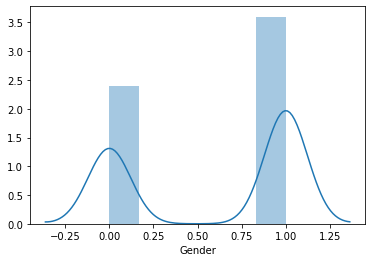

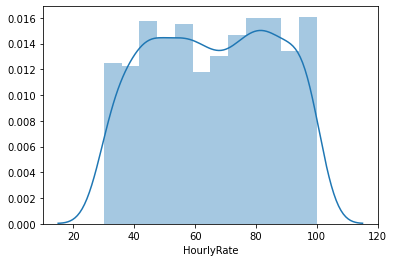

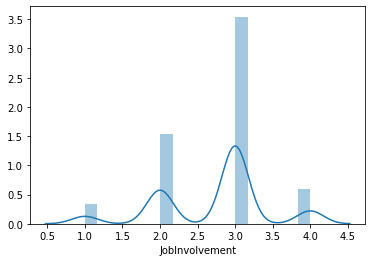

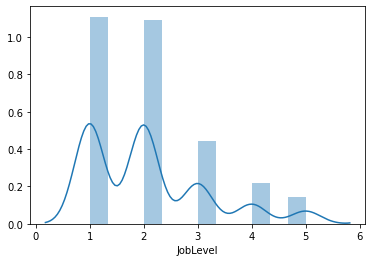

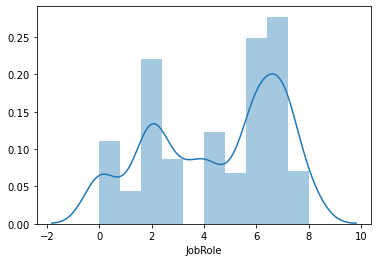

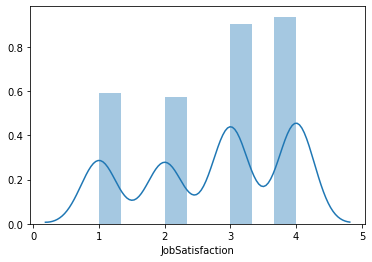

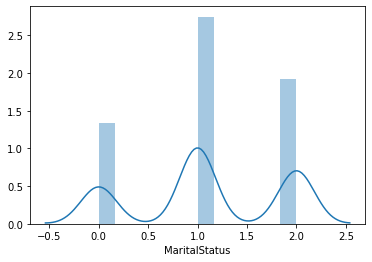

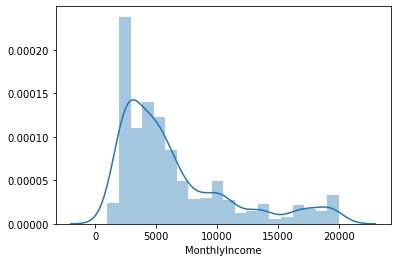

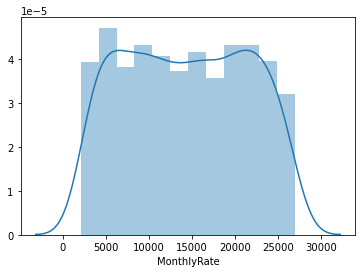

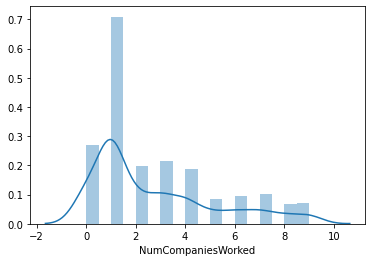

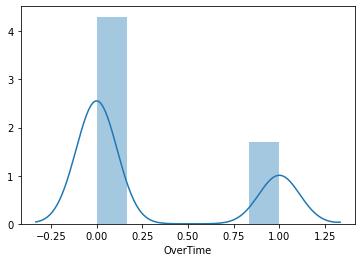

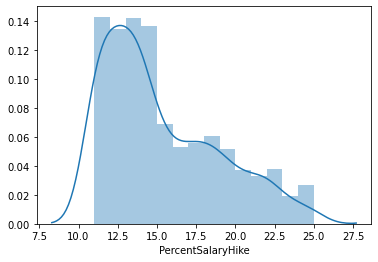

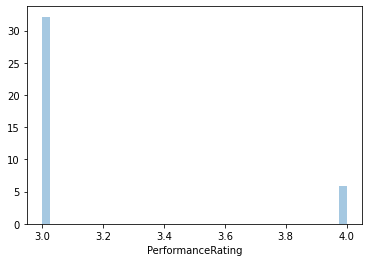

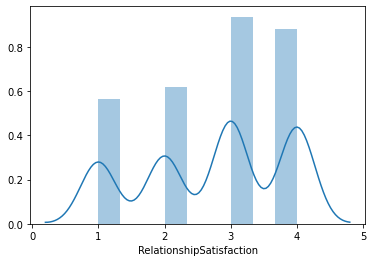

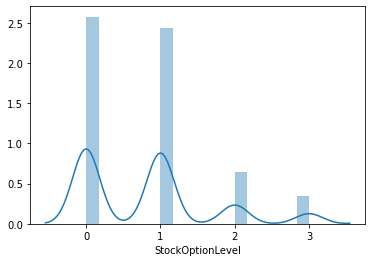

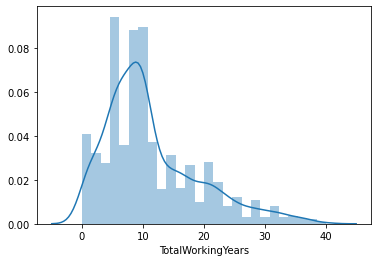

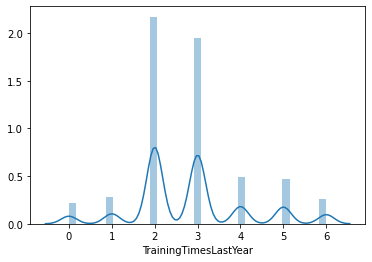

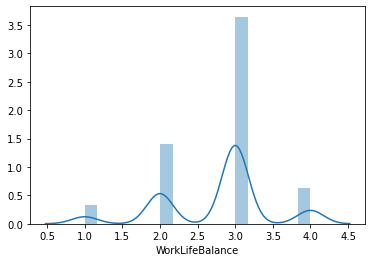

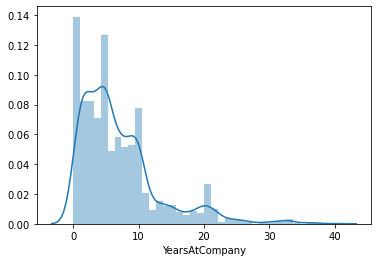

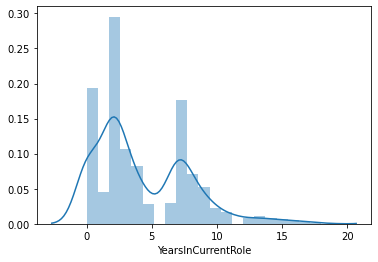

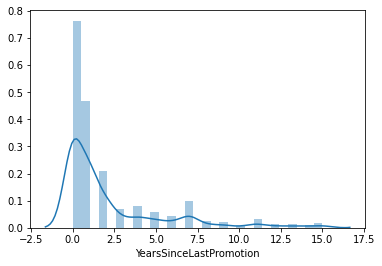

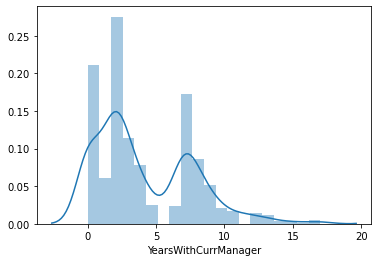

<Figure size 432x288 with 0 Axes>

In [33]:
for i in df.columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.figure()

In [34]:
from sklearn.preprocessing import power_transform
print(power_transform(df))

[[ 0.52213976  2.28090588  0.63546836 ...  0.2055623  -1.09486169
   0.49014719]
 [ 1.27641097 -0.4384223  -1.39286498 ...  0.883888    0.09685415
   0.90963491]
 [ 0.10209148  2.28090588  0.63546836 ... -1.59643394 -1.09486169
  -1.55015588]
 ...
 [-1.12375507 -0.4384223   0.63546836 ... -0.44664507 -1.09486169
  -0.05300033]
 [ 1.27641097 -0.4384223  -1.39286498 ...  0.68299511 -1.09486169
   1.09011007]
 [-0.23618832 -0.4384223   0.63546836 ... -0.08961473  0.09685415
  -0.40688122]]


* The distplot shows the skewness is present in the data.
* The power_transformation methord is used to remove the skewness.

In [35]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


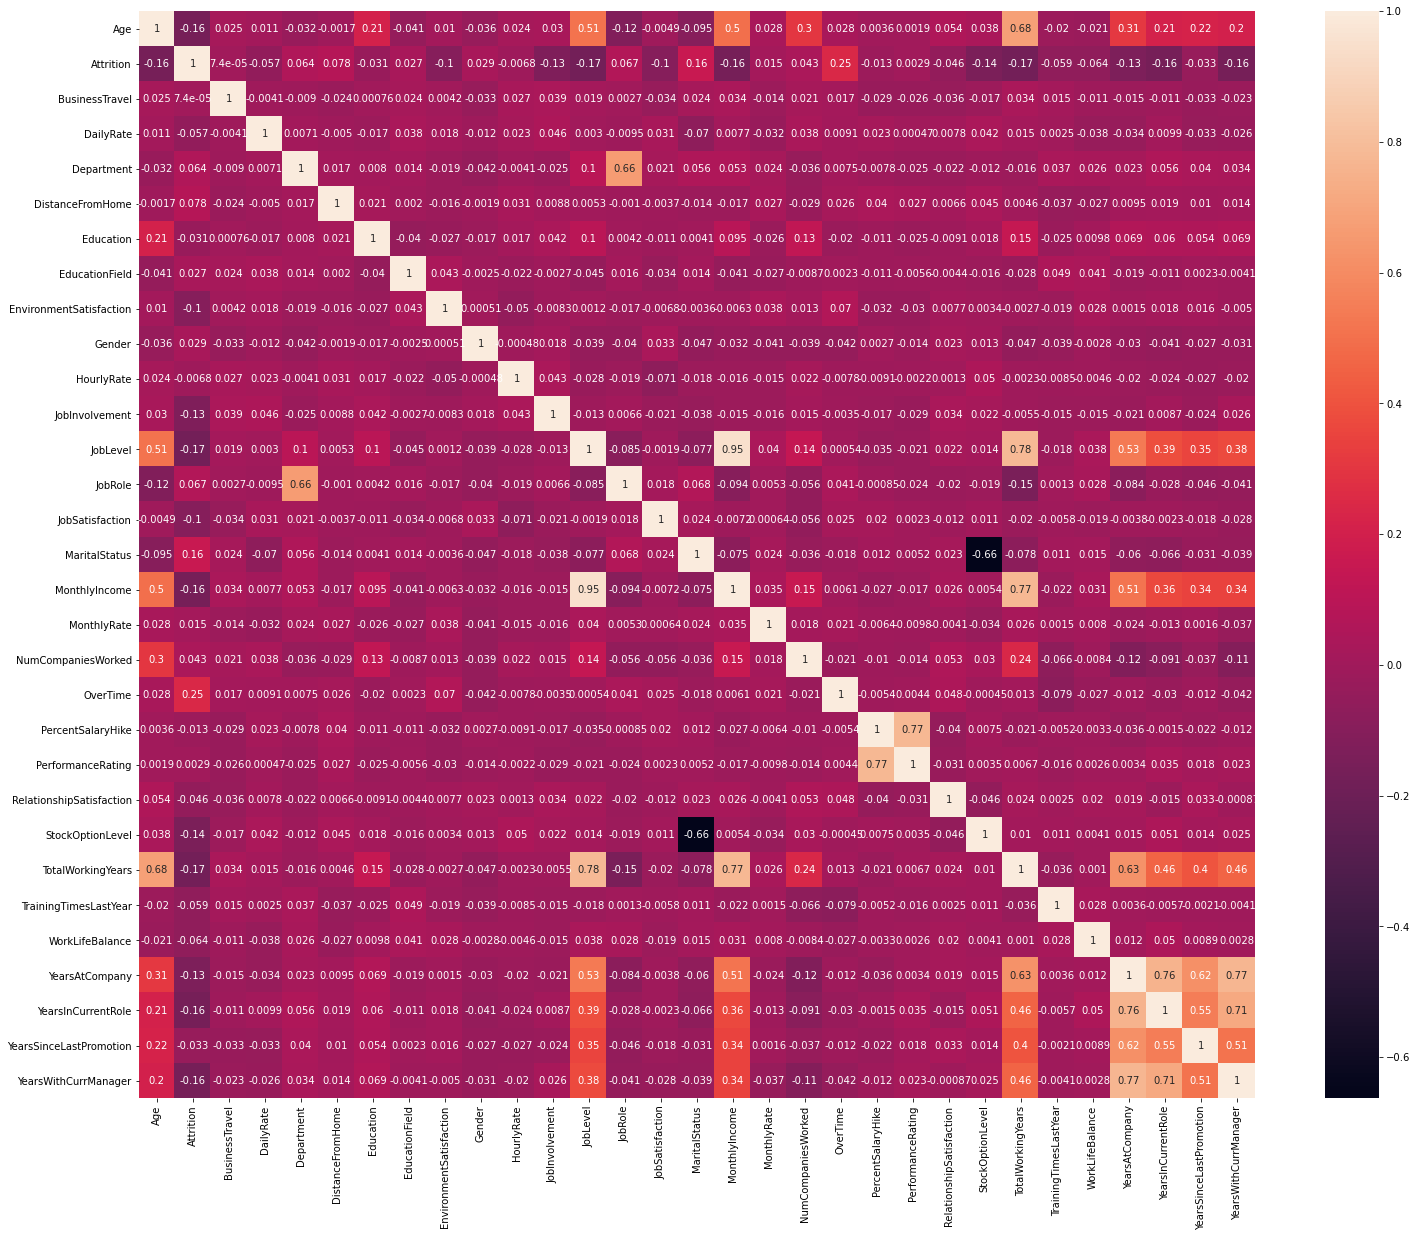

In [36]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)

* The columns YearsAtCompany ,YearsInCurrentRole ,YearsWithCurrentManager ,StockOptionaLevel ,TotalWorkingYears ,MonthlyIncome, JobLevel,JobInvolvement are negatively correlated with 'Attrition'column.
* The column MaritalStatus & Over18 are positively correlated with 'Attrition'column. 


In [37]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [38]:
 # Model Training

In [39]:
xn=df.drop(['Attrition'],axis=1)

In [40]:
y=df['Attrition']
y=pd.DataFrame(data=y)

In [41]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(xn)
x=pd.DataFrame(x,columns=xn.columns)

In [42]:
# Standard Scaler is used to scaling the data or normalising.

In [43]:
max_r_score=0;
for r in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=r)
    lg=LogisticRegression()
    lg.fit(x_train,y_train) 
    pred=lg.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    if accuracy> max_r_score:
        max_r_score=accuracy;
        final_r_state=r;
print('max accuracy score for random state:',final_r_state,"is:",max_r_score)

max accuracy score for random state: 40 is: 0.9074074074074074


In [44]:
# the Logistic Regression model is giving beat result at randaom state at 40.

In [45]:
print(x_train.shape ,'\t',y_train.shape)

(1146, 30) 	 (1146, 1)


In [46]:
print(x_test.shape ,'\t',y_test.shape)

(324, 30) 	 (324, 1)


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=40)

In [48]:
lg=LogisticRegression()
lg.fit(x_train,y_train) 
pred=lg.predict(x_test)
print('accuracy score:',accuracy_score(y_test,pred),'\n')
print('confusion_matrix:','\n',confusion_matrix(y_test,pred),'\n')
print('classification_report:','\n',classification_report(y_test,pred))

accuracy score: 0.9074074074074074 

confusion_matrix: 
 [[267   5]
 [ 25  27]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       272
           1       0.84      0.52      0.64        52

    accuracy                           0.91       324
   macro avg       0.88      0.75      0.79       324
weighted avg       0.90      0.91      0.90       324



The Logistic Regression model is giving the accuracy score of 0.9074.

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
model=[GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()];

In [51]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(m,'\n')
    print('accuracy score:',accuracy_score(y_test,predm),'\n')   
    print('confusion_matrix:','\n',confusion_matrix(y_test,predm),'\n')
    print('classification_report:','\n',classification_report(y_test,predm))
    print('************************************************************************************************************')
    print('\n')

GaussianNB() 

accuracy score: 0.8209876543209876 

confusion_matrix: 
 [[232  40]
 [ 18  34]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       272
           1       0.46      0.65      0.54        52

    accuracy                           0.82       324
   macro avg       0.69      0.75      0.71       324
weighted avg       0.85      0.82      0.83       324

************************************************************************************************************


DecisionTreeClassifier() 

accuracy score: 0.7592592592592593 

confusion_matrix: 
 [[232  40]
 [ 38  14]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       272
           1       0.26      0.27      0.26        52

    accuracy                           0.76       324
   macro avg       0.56      0.56      0.56       324
weighted avg       0.76      0.76 

The SVC model is giving the best accuracy score i.e 0.8734. but still less than Logistic Regression model.

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
parameters={'kernel':['linear','poly','rgf'],'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


The GridSearchCV model is used for Hypertunning the SVC model to check if it give the best result.

In [54]:
svc=SVC(kernel='linear',C=10)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,predsvc),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,predsvc),'\n')
print('classification_report:','\n',classification_report(y_test,predsvc))

accuracy score: 0.8919753086419753 

confusion_matrix: 
 [[271   1]
 [ 34  18]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       272
           1       0.95      0.35      0.51        52

    accuracy                           0.89       324
   macro avg       0.92      0.67      0.72       324
weighted avg       0.90      0.89      0.87       324



The accuracy score of SVC model is 0.8919.

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
svcscore=cross_val_score(svc,x,y,cv=5)
print(svcscore)

[0.86054422 0.86734694 0.86734694 0.87414966 0.8707483 ]


In [57]:
print(svcscore.mean(),svcscore.std())

0.8680272108843538 0.004512414680755651


The cross validation is used to remove the underfitting and overfitting of the data.

In [58]:
#Ensemble Techniques

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf=RandomForestClassifier(n_estimators=100,random_state=40)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)

1.0

In [61]:
print('accuracy score:',accuracy_score(y_test,predrf),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,predrf),'\n')
print('classification_report:','\n',classification_report(y_test,predrf))

accuracy score: 0.8641975308641975 

confusion_matrix: 
 [[270   2]
 [ 42  10]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       272
           1       0.83      0.19      0.31        52

    accuracy                           0.86       324
   macro avg       0.85      0.59      0.62       324
weighted avg       0.86      0.86      0.83       324



In [62]:
# AdaBoostClassifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
ada=AdaBoostClassifier(base_estimator=svc,n_estimators=20,random_state=40,algorithm='SAMME')
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
ada.score(x_train,y_train)

0.8272251308900523

In [65]:
print('accuracy score:',accuracy_score(y_test,predada),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,predada),'\n')
print('classification_report:','\n',classification_report(y_test,predada))

accuracy score: 0.8487654320987654 

confusion_matrix: 
 [[247  25]
 [ 24  28]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       272
           1       0.53      0.54      0.53        52

    accuracy                           0.85       324
   macro avg       0.72      0.72      0.72       324
weighted avg       0.85      0.85      0.85       324



* The AdaBoostClassifier is used with SVC as base estimator to get the best score.

In [66]:
# Cross Validation

In [67]:
lgscore=cross_val_score(lg,x,y,cv=5)
print(lgscore)

[0.88095238 0.86734694 0.86054422 0.8537415  0.86734694]


In [68]:
print(lgscore.mean(),lgscore.std())

0.865986394557823 0.009024829361511302


The Logistic Regression model is cross validated to overcome underfitting & overfitting.

In [69]:
# AUC-ROC curve

In [70]:
from sklearn.metrics import roc_auc_score,roc_curve

In [79]:
fpr,tpr,thresolds=roc_curve(y_test,predada)

In [80]:
fpr

array([0.        , 0.09191176, 1.        ])

In [81]:
tpr

array([0.        , 0.53846154, 1.        ])

In [82]:
thresolds

array([2, 1, 0])

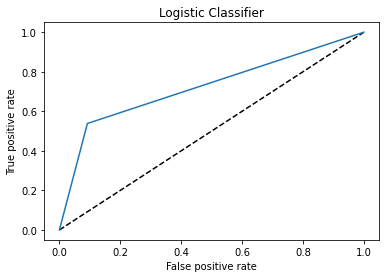

In [83]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Classifier')
plt.show()

The ROC curve is used to represented the y_test and predicted data.

In [76]:
# Saving the best model

In [77]:
import joblib

In [78]:
joblib.dump(ada,'Attrition_dataset.pkl')

['Attrition_dataset.pkl']